In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Data Description
- application_{train|test}.csv

    - This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
    - Static data for all applications. One row represents one loan in our data sample.

- bureau.csv
    - All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
    - For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

- bureau_balance.csv
    - Monthly balances of previous credits in Credit Bureau.
    - This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

- POS_CASH_balance.csv
    - Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
    - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

- credit_card_balance.csv
    - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
    - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

- previous_application.csv
    - All previous applications for Home Credit loans of clients who have loans in our sample.
    - There is one row for each previous application related to loans in our data sample.

- installments_payments.csv
    - Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
    - There is a) one row for every payment that was made plus b) one row each for missed payment.
    - One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

- HomeCredit_columns_description.csv
    - This file contains descriptions for the columns in the various data files.
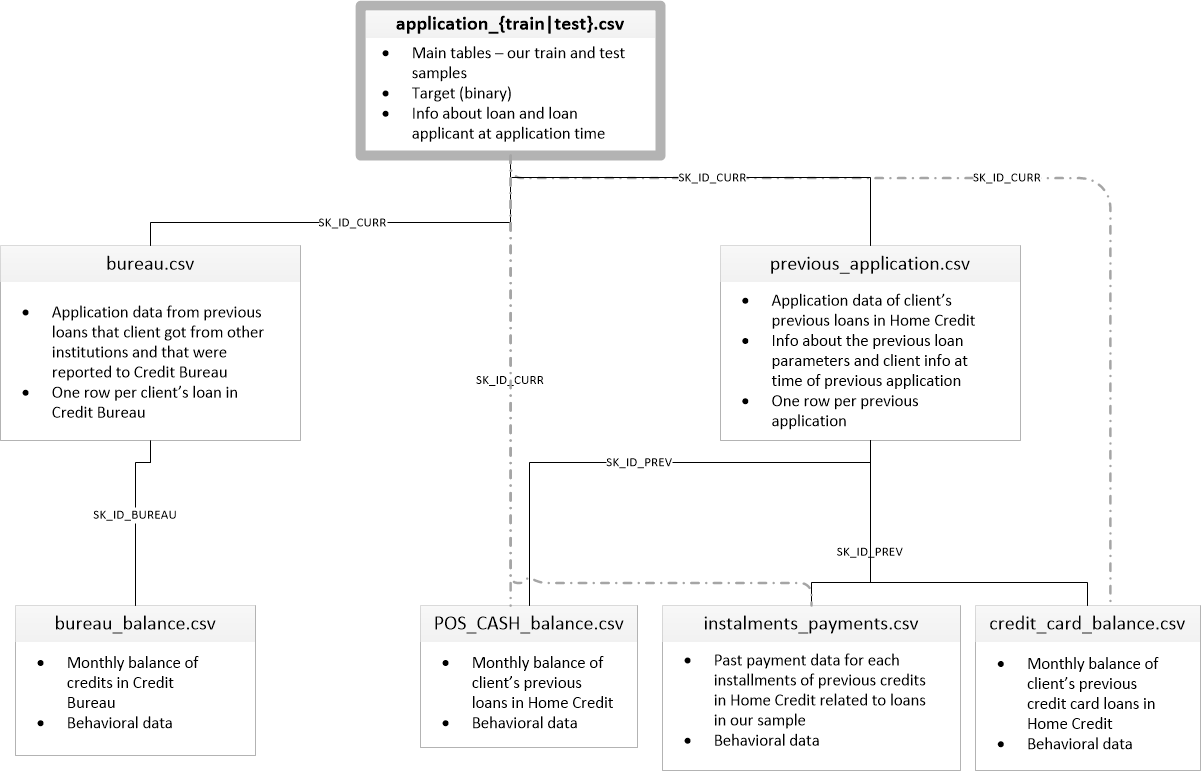

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import helpers as h

DATA_ROOT_PATH = 'data'
h.seed_everything(7)

import os
for dirname, _, filenames in os.walk(DATA_ROOT_PATH):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\application_test.csv
data\application_train.csv
data\bureau.csv
data\bureau_balance.csv
data\credit_card_balance.csv
data\home-credit-default-risk.zip
data\HomeCredit_columns_description.csv
data\installments_payments.csv
data\POS_CASH_balance.csv
data\previous_application.csv
data\sample_submission.csv


In [3]:
app_test = pd.read_csv(os.path.join(DATA_ROOT_PATH,'application_test.csv')).replace(regex='[^A-Za-z0-9 ]+', value='')
# app_train = pd.read_csv(os.path.join(DATA_ROOT_PATH,'application_train.csv'))
# bureau = pd.read_csv(os.path.join(DATA_ROOT_PATH,'bureau.csv'))
# bureau_bal = pd.read_csv(os.path.join(DATA_ROOT_PATH,'bureau_balance.csv'))
# cc_bal = pd.read_csv(os.path.join(DATA_ROOT_PATH,'credit_card_balance.csv'))
# # home_cred_col_desc = pd.read_csv(os.path.join(DATA_ROOT_PATH,'HomeCredit_columns_description.csv'))
# inst_pymt = pd.read_csv(os.path.join(DATA_ROOT_PATH,'installments_payments.csv'))
# pos_cash_bal = pd.read_csv(os.path.join(DATA_ROOT_PATH,'POS_CASH_balance.csv'))
# prev_app = pd.read_csv(os.path.join(DATA_ROOT_PATH,'previous_application.csv'))
# samp_sub = pd.read_csv(os.path.join(DATA_ROOT_PATH,'sample_submission.csv'))

In [4]:
h.resumetable(app_test, font_size=40, cols=4)

Dataset Shape: (48744, 121)


Name   dtypes  Missing  Missing %  Uniques  \
0                      SK_ID_CURR    int64        0   0.000000    48744   
1              NAME_CONTRACT_TYPE   object        0   0.000000        2   
2                     CODE_GENDER   object        0   0.000000        2   
3                    FLAG_OWN_CAR   object        0   0.000000        2   
4                 FLAG_OWN_REALTY   object        0   0.000000        2   
5                    CNT_CHILDREN    int64        0   0.000000       11   
6                AMT_INCOME_TOTAL  float64        0   0.000000      606   
7                      AMT_CREDIT  float64        0   0.000000     2937   
8                     AMT_ANNUITY  float64       24   0.000492     7491   
9                 AMT_GOODS_PRICE  float64        0   0.000000      677   
10                NAME_TYPE_SUITE   object      911   0.018689        7   
11               NAME_INCOME_TYPE   object        0   0.000000        7   
12            NAME_EDUCATION_TYPE   object        0   0.000000        5   
13             NAME_FAMILY_STATUS   object        0   0.000000        5   
14              NAME_HOUSING_TYPE   object        0   0.000000        6   
15     REGION_POPULATION_RELATIVE  float64        0   0.000000       81   
16                     DAYS_BIRTH    int64        0   0.000000    15477   
17                  DAYS_EMPLOYED    int64        0   0.000000     7863   
18              DAYS_REGISTRATION  float64        0   0.000000    12618   
19                DAYS_ID_PUBLISH    int64        0   0.000000     5880   
20                    OWN_CAR_AGE  float64    32312   0.662892       52   
21                     FLAG_MOBIL    int64        0   0.000000        2   
22                 FLAG_EMP_PHONE    int64        0   0.000000        2   
23                FLAG_WORK_PHONE    int64        0   0.000000        2   
24               FLAG_CONT_MOBILE    int64        0   0.000000        2   
25                     FLAG_PHONE    int64        0   0.000000        2   
26                     FLAG_EMAIL    int64        0   0.000000        2   
27                OCCUPATION_TYPE   object    15605   0.320142       18   
28                CNT_FAM_MEMBERS  float64        0   0.000000       12   
29           REGION_RATING_CLIENT    int64        0   0.000000        3   
30    REGION_RATING_CLIENT_W_CITY    int64        0   0.000000        4   
31     WEEKDAY_APPR_PROCESS_START   object        0   0.000000        7   
32        HOUR_APPR_PROCESS_START    int64        0   0.000000       24   
33     REG_REGION_NOT_LIVE_REGION    int64        0   0.000000        2   
34     REG_REGION_NOT_WORK_REGION    int64        0   0.000000        2   
35    LIVE_REGION_NOT_WORK_REGION    int64        0   0.000000        2   
36         REG_CITY_NOT_LIVE_CITY    int64        0   0.000000        2   
37         REG_CITY_NOT_WORK_CITY    int64        0   0.000000        2   
38        LIVE_CITY_NOT_WORK_CITY    int64        0   0.000000        2   
39              ORGANIZATION_TYPE   object        0   0.000000       58   
40                   EXT_SOURCE_1  float64    20532   0.421221    27207   
41                   EXT_SOURCE_2  float64        8   0.000164    38885   
42                   EXT_SOURCE_3  float64     8668   0.177827      702   
43                 APARTMENTS_AVG  float64    23887   0.490050     1543   
44               BASEMENTAREA_AVG  float64    27641   0.567065     2816   
45    YEARS_BEGINEXPLUATATION_AVG  float64    22856   0.468899      175   
46                YEARS_BUILD_AVG  float64    31818   0.652757      130   
47                 COMMONAREA_AVG  float64    33495   0.687161     2042   
48                  ELEVATORS_AVG  float64    25189   0.516761      181   
49                  ENTRANCES_AVG  float64    23579   0.483731      200   
50                  FLOORSMAX_AVG  float64    23321   0.478438      252   
51                  FLOORSMIN_AVG  float64    32466   0.666051      198   
52                   LANDAREA_AVG  float64    28254   